In [1]:
# compare Psalms with Shuila prayers

# parser for ATF files about shuila prayers

## Import packages
from pathlib import Path
import re
import pandas as pd
import numpy as np
import csv
import glob
import spacy
from spacy.symbols import nsubj, VERB, ADJ
from spacy.lang.en import English
from spacy.lang.it import Italiano


def Mis_god(variable):
    names = ["Marduk", "Enlil", "Apsû", "Tia-mat", "Lah(mu", "Lah(amu", "Anšar", "Kišar", "Anu", "Nudimmud", 
             "Mummu", "Ea", "Damkina", "Be-l", "Mari-utu", "H(ubur", "Qingu", "Kaka", "Šamaš", "Usmû", "Enki",
             "Abzu", "An", "Nunamnir", "Elil", "Nishiku", "Utu", "Shamash", "Nanna-Suen", "Nanna", "Enzu", "Zuen", "Suen", "Sin", "Nergal", 
             "Nabu", "Inanna", "Ishtar", "Ninurta", "Ningirsu", "Tiamat", "Anshar", "Kishar", "Ki", "Nammu",
             "Ashur", "Dagan", "Dumuzid", "Tammuz", "Ereshkigal", "Geshtinanna", "Gilgamesh", "Gula", "Nintunugga",
             "Ninkarrak", "Meme", "Bau", "Ninisina", "Ishkur", "Adad", "Ishtaran", "Ištaran", "Nanshe", "Ninazu", "Ningal",
             "Nikkal", "Ningishzida", "Ninhursag", "Damgainuna", "Ninmah", "Ninlil", "Ninshubur", "Nisaba", "Ninsikila", "Utu", "Dilmun", 
             "Damgalnuna", "Ninḫursaĝa", "Ninnisig", "Isimud", "Ninimma", "Uttu", "Nibru", "Ninsikila", "Ninkasi", "Ensag", "Nazi", "Nindara", "Azimua", 
             "Ninĝišzida", "Ninti", "Namma", "Šu-zi-ana", "Ninhada", "Ninbarag", "Ninmug", "Ninguna", "Ninmaḫ", "Niĝir-sig", "Urim", "Marḫaši",
             "Inana", "Aruru", "Nintur", "Ninisina", "Nanše", "Nunamnir", "Enbilulu", "Ḫaia", "Sud"]
    if (variable in names):
        return True
    else:
        return False
    
def Bis_god(variable):
    names = ["YHWH","Lord","God","Yahweh"]
    
    if (variable in names):
        return True
    else:
        return False
    
# start code for extracting text 
# THIS IS FOR MESOPOTAMIAN SHUILA PRAYERS

nlp = spacy.load("en_core_web_md")
lemmatizer = nlp.get_pipe("lemmatizer")

Madjectives = []
Mverbs = []
data = []

path = '../EADHproject/shuila/*.atf'
outpath = './shuila/'
for file in glob.glob(path):
    with open(file, encoding='utf-8', errors='ignore') as file_in:
        text = ""
        t = ""
        firstline = file_in.readline()
        #print (firstline)
        # first parse the header code for the text
        header = firstline.split('&')[1].split(" ")[0]  
        # print (header)
        
        # then parse the english text to a simple string
        lines = file_in.readlines()
        for line in lines:
            if "#tr.en:" in line:
                t = line.replace("#tr.en: ", "")
                text = text + " " + t
        # now remove brackets 
        text = text.replace("[", "")
        text = text.replace("]", "")
        # get rid of (parenthetical comments)
        text = re.sub("[\(\[].*?[\)\]]", "", text)
        # remove lots of periods
        text = text.replace(". .", "")
        text = text.replace("  ", " ")
        text = text.replace("\n", " ")
        
        # output cleaned text files.
        with open(outpath + header + '.txt', 'w') as f:
            f.write(text)
        
        #then apply nlp
        
        doc = nlp(text)

        for sent in doc.sents:   #iterate over sentences
            for word in sent:   #iterate over words to find verbs
                if word.pos == VERB:
                    Mverbs.append(word.lemma_)
                if word.pos == ADJ:
                    Madjectives.append(word.lemma_)
                if word.lemma_ == "say" or word.lemma_ =="speak": # find out who is speaking
                    for subject in word.head.children:
                        if subject.dep_ == "nsubj": 
                            #print (header, subject.text, word.head.text, "///", sent)
                            data.append([header, subject.text, word.head.text, sent])
df = pd.DataFrame(data, columns=['filename', 'subject', 'verb', 'complete sentence'])
df.to_csv('../EADHproject/shuila_speaking_god.csv')
        #THIS WHOLE LOOP RETURNS ONLY ONE INSTANCE OF "SHAMASH SPOKE"
        #for sent in doc.sents:   #iterate over sentences   
        #    for god in sent:   #iterate over words 
        #        if Mis_god(god.text):   #if a word is a name of a mesopotamian god, extract dependencies for verb and dobj       
        #            if god.head.lemma_ == "say" or god.head.lemma_ == "speak":
        #                #speakingGod += 1
        #                print (god.text, god.head.text, " /// ", sent)
                        
                    
                    


In [2]:
# now do PSALMS
from pathlib import Path
import re
import pandas as pd
import numpy as np
import csv
import glob
import spacy
from spacy.symbols import nsubj, VERB, ADJ
from spacy.lang.en import English

nlp = spacy.load("en_core_web_md")
lemmatizer = nlp.get_pipe("lemmatizer")

Badjectives = []
Bverbs = []

Bpath = '../EADHproject/bible/psalms.txt'
for file in glob.glob(Bpath):
    with open(file, encoding='utf-8', errors='ignore') as file_in:
        text = ""
        result = ""
        
        # then parse the english text to a simple string
        lines = file_in.readlines()
        for line in lines:
            result = ''.join([i for i in line if not i.isdigit()])  #eliminate digits
            text = text + " " + result
        
        # get rid of [(parenthetical comments)]
        text = re.sub("[\(\[].*?[\)\]]", "", text)
        text = text.replace("PSALMS", "")
        # remove lots of periods
        text = text.replace(". .", "")
        text = text.replace("\n", " ")
        #get rid of whitespaces
        text = " ".join(text.split())
        
        #print (text)
        # output cleaned text files.
        #with open(outpath + header + '.txt', 'w') as f:
        #    f.write(text)
        
        #then apply nlp
        
        doc = nlp(text)

        for sent in doc.sents:   #iterate over sentences
            for word in sent:   #iterate over words to find verbs
                if word.pos == VERB:
                    Bverbs.append(word.lemma_)
                if word.pos == ADJ:
                    Badjectives.append(word.lemma_)
                if word.lemma_ == "say" or word.lemma_ =="speak": # find out who is speaking
                    for subject in word.head.children:
                        if subject.dep_ == "nsubj": 
                            #print (subject.text, word.head.text, "///", sent)
                            data.append([header, subject.text, word.head.text, sent])
df = pd.DataFrame(data, columns=['filename', 'subject', 'verb', 'complete sentence'])
df.to_csv('../EADHproject/psalms_speaking_god.csv')

#        print ("next we see the God's actual speech////////////////////////")
#        for sent in doc.sents:                    
#            for god in sent:   #iterate over words 
#                if Bis_god(god.text):   #if a word is a name of a mesopotamian god, extract dependencies for verb and dobj       
#                    if god.head.lemma_ == "say" or god.head.lemma_ == "speak":
#                        #speakingGod += 1
#                        print (god.text, god.head.text, " /// ", sent)

In [3]:
#convert it to dictionary with values and its occurences
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

Mverb_counts = Counter(Mverbs)
Madj_counts = Counter(Madjectives)
Bverb_counts = Counter(Bverbs)
Badj_counts = Counter(Badjectives)

#  put counts in a dataframe
df_verbs = pd.DataFrame(Bverb_counts.items(), columns = ['verbs', 'Bfrequency'])
df_verbs['Mfrequency'] = df_verbs['verbs'].map(Mverb_counts)  # THIS IS LOSING WORDS THAT ARE NOT PRESENT IN BIBLE!!
df_verbs['Mnormalized'] = df_verbs['Mfrequency']/len(df_verbs)
df_verbs['Bnormalized'] = df_verbs['Bfrequency']/len(df_verbs)

df_adj = pd.DataFrame(Badj_counts.items(), columns = ['adjectives', 'Bfrequency'])
df_adj['Mfrequency'] = df_adj['adjectives'].map(Madj_counts) # THIS IS LOSING WORDS THAT ARE NOT PRESENT IN BIBLE!!
df_adj['Mnormalized'] = df_adj['Mfrequency']/len(df_adj)
df_adj['Bnormalized'] = df_adj['Bfrequency']/len(df_adj)


df_adj.to_csv('../EADHproject/adjective_frequency.csv')
df_verbs.to_csv('../EADHproject/verb_frequency.csv')

In [4]:
# shorten dataframes to keep nonzero value words
df_adj = df_adj.drop(df_adj[df_adj.Mfrequency < 3].index)
df_verbs = df_verbs.drop(df_verbs[df_verbs.Mfrequency < 3].index)

print(df_adj)

    adjectives  Bfrequency  Mfrequency  Mnormalized  Bnormalized
2    righteous          60           8     0.022599     0.169492
6         holy          35           3     0.008475     0.098870
8         wise           8          18     0.050847     0.022599
9        angry           6         113     0.319209     0.016949
11        many          26          17     0.048023     0.073446
..         ...         ...         ...          ...          ...
311        ill           1           3     0.008475     0.002825
326      broad           1           4     0.011299     0.002825
330    crooked           1           3     0.008475     0.002825
331      happy           7           7     0.019774     0.019774
332  attentive           1          14     0.039548     0.002825

[68 rows x 5 columns]


In [5]:
# measure similarity between words so we can make groups
# output a similarity matrix that compares every word currently in data to every other phrase

# change variable here to switch between adjectives and verbs
d = df_adj

nNodes = d.shape[0]  
similarity_df = pd.DataFrame()
similarity_df = similarity_df.astype(np.float)
sourceList = []
targetList = []
similarityList = []

# Make a giant nSources x nTargets incidence matrix (data frame)
all_sources = list(d.adjectives)   #this needs changing to verbs for the other matrix
all_targets = all_sources

# One row per source
similarity_df = pd.DataFrame(index=np.arange(len(all_sources)), columns=all_targets)
line = -1
for i in similarity_df:
    #print (i)
    line +=1
    for j in similarity_df:      
        source = nlp(i)
        target = nlp(j)
        similarity = source.similarity(target)  #calculate cosine similarity between the two phrases
        similarity_df.at[line,j] = similarity


similarity_df.head()
similarity_df.to_csv("../EADHproject/similarity.csv")


In [6]:
# look for similarity values above some level and output clusters of terms
inverse_similarity_df = similarity_df

from sklearn.decomposition import PCA
 
pca = PCA(2) # we need 2 principal components.  THIS ALGORITHM REDUCES DIMENSION FROM 82 X 82 --> 82 X 2. 
converted_data = pca.fit_transform(inverse_similarity_df)
 
converted_data.shape


(68, 2)

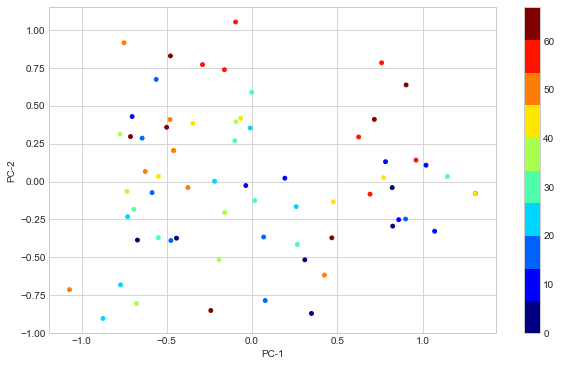

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = inverse_similarity_df.index)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [8]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(converted_data)
 
print(label)
x = 0
for x in np.arange(5):
    print (f"cluster {x}")
    for i in np.arange(len(all_sources)):
        if label[i] == x:
            print (all_sources[i])

[2 2 0 2 4 0 4 2 0 2 0 2 2 1 2 3 4 0 0 1 1 0 3 1 4 4 1 4 3 0 0 3 2 1 1 4 1
 0 1 0 3 2 2 1 3 3 0 3 0 3 4 1 1 1 3 2 3 3 2 2 2 1 1 0 3 2 4 2]
cluster 0
wise
afraid
weak
old
glad
poor
proud
young
worthy
true
sweet
dead
sick
ill
cluster 1
high
full
strong
long
pleasant
perfect
small
clean
fine
such
present
beautiful
clear
short
fresh
cluster 2
righteous
holy
angry
evil
weary
ashamed
awake
wicked
merciful
exalted
mighty
beloved
firstborn
sanctuary
fierce
crooked
attentive
cluster 3
low
pure
equal
dark
acceptable
due
powerful
new
wide
free
firm
red
broad
cluster 4
many
own
whole
good
great
right
sure
well
happy


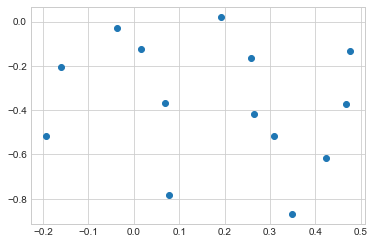

In [9]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = converted_data[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

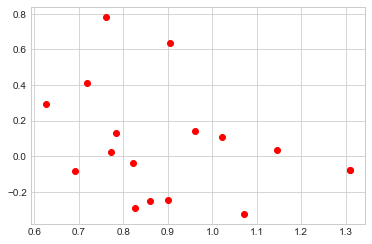

In [10]:
#filter rows of original data
filtered_label2 = converted_data[label == 2]
 
filtered_label8 = converted_data[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

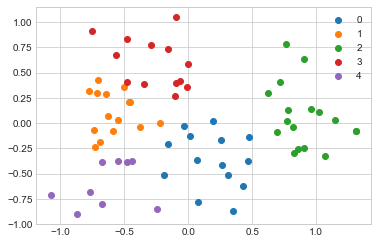

In [11]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(converted_data[label == i , 0] , converted_data[label == i , 1] , label = i)
plt.legend()
plt.show()

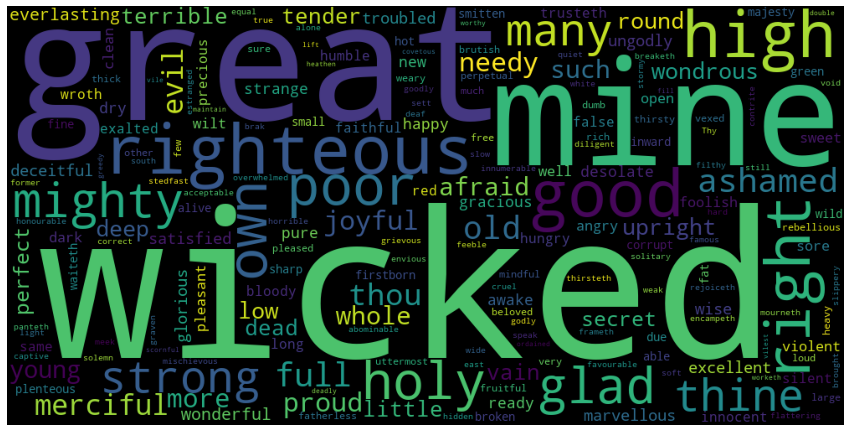

In [12]:
# make wordclouds to see lemma frequency
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(Badj_counts)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
#plt.close()